In [ ]:
from PIL import Image
import numpy
im = Image.open("dots_topography.png")
imarray = numpy.array(im)
imarray.shape

(1783, 1201, 3)

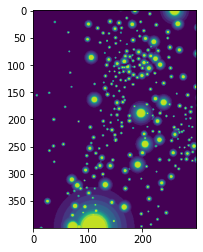

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(imarray[600:1000,200:500,1])

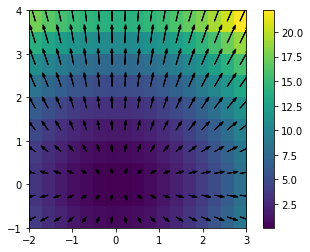

In [ ]:
# stack overflow example of plotting a gradient
# https://stackoverflow.com/questions/56046811/how-make-a-correct-gradient-map-using-numpy-gradient
import matplotlib.pyplot as plt
import numpy as np
import math
function_to_plot = lambda x, y: x**2 + y**2
horizontal_min, horizontal_max, horizontal_stepsize = -2, 3, 0.3
vertical_min, vertical_max, vertical_stepsize = -1, 4, 0.5

horizontal_dist = horizontal_max-horizontal_min
vertical_dist = vertical_max-vertical_min

horizontal_stepsize = horizontal_dist / float(math.ceil(horizontal_dist/float(horizontal_stepsize)))
vertical_stepsize = vertical_dist / float(math.ceil(vertical_dist/float(vertical_stepsize)))

xv, yv = np.meshgrid(np.arange(horizontal_min, horizontal_max, horizontal_stepsize),
                     np.arange(vertical_min, vertical_max, vertical_stepsize))
xv+=horizontal_stepsize/2.0
yv+=vertical_stepsize/2.0

result_matrix = function_to_plot(xv, yv)
yd, xd = np.gradient(result_matrix)

def func_to_vectorize(x, y, dx, dy, scaling=0.1):
    plt.arrow(x, y, dx*scaling, dy*scaling, fc="k", ec="k", head_width=0.06, head_length=0.1)

vectorized_arrow_drawing = np.vectorize(func_to_vectorize)

plt.imshow(np.flip(result_matrix,0), extent=[horizontal_min, horizontal_max, vertical_min, vertical_max])
vectorized_arrow_drawing(xv, yv, xd, yd, 0.1)
plt.colorbar()
plt.show()

In [ ]:
(xv.shape, yv.shape, xd.shape, yd.shape)

((10, 17), (10, 17), (10, 17), (10, 17))

In [ ]:
import numpy as np
import pandas as pd

img_data = imarray[:,:,0]
gradient_dir = np.array(np.gradient(img_data))

dy = gradient_dir[0].ravel()
dx = gradient_dir[1].ravel()
scale = np.maximum(np.absolute(dy), numpy.ones(dy.shape))
scale = np.maximum(scale, np.absolute(dx))
dy_norm = dy/scale
dx_norm = dx/scale
y = np.array(range(gradient_dir[0].shape[0]))
x = np.array(range(gradient_dir[0].shape[1]))
yx = np.array(np.meshgrid(y, x)).T.reshape(-1,2)

gradient_data = pd.DataFrame(np.column_stack((yx, dy, dx, dy_norm, dx_norm)),  columns=['y', 'x', 'dy', 'dx', 'dy_norm', 'dx_norm'])


In [ ]:
gradient_data.to_csv('data.csv')

In [ ]:
a = np.array([1,2,3,0])
np.maximum(a,numpy.ones(a.shape))

array([1., 2., 3., 1.])

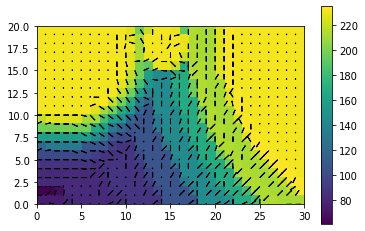

In [ ]:
img_arr = imarray[980:1000,270:300,1]
horizontal_min, horizontal_max, horizontal_stepsize = 0, img_arr.shape[1], 1
vertical_min, vertical_max, vertical_stepsize = 0, img_arr.shape[0], 1
xv, yv = np.meshgrid(np.arange(horizontal_min, horizontal_max, horizontal_stepsize),
                     np.arange(vertical_min, vertical_max, vertical_stepsize))
xd = np.gradient(img_arr)[0]
yd = np.gradient(img_arr)[1]
result_matrix = img_arr

def func_to_vectorize(x, y, dx, dy, scaling=0.01):
    scaling = 1 / max(abs(dx),abs(dy),1) 
    plt.arrow(x, y, dx*scaling / 2, dy*scaling/2, fc="k", ec="k", head_width=0.06, head_length=0.1)

vectorized_arrow_drawing = np.vectorize(func_to_vectorize)

plt.imshow(np.flip(result_matrix,0), extent=[horizontal_min, horizontal_max, vertical_min, vertical_max])
vectorized_arrow_drawing(xv, yv, xd, yd, 0.1)

plt.colorbar()
plt.show()


Problem:
The derivate is 0 in many points, I can solve this by propagating the derivative that's in other locations to the center.
Ideally what I would like to to is to somehow fit a smooth surface to the surface curves I have https://nurbs-python.readthedocs.io/en/5.x/module_fitting.html https://web.me.iastate.edu/idealab/c-nurbs-python.html 


## Smooth ?

In [8]:
from PIL import Image
import numpy
im = Image.open("/content/drive/MyDrive/Winter 2021/COMPUTER W  MEDIA (MAT 201B)/project/dots_topography_smooth_2.png")
imarray = numpy.array(im)
imarray.shape

(1783, 1201, 4)

In [9]:
import numpy as np
import pandas as pd

img_data = imarray[:,:,0]
gradient_dir = np.array(np.gradient(img_data))

dy = gradient_dir[0].ravel()
dx = gradient_dir[1].ravel()
scale = np.maximum(np.absolute(dy), numpy.ones(dy.shape))
scale = np.maximum(scale, np.absolute(dx))
dy_norm = dy/scale
dx_norm = dx/scale
y = np.array(range(gradient_dir[0].shape[0]))
x = np.array(range(gradient_dir[0].shape[1]))
yx = np.array(np.meshgrid(y, x)).T.reshape(-1,2)

gradient_data = pd.DataFrame(np.column_stack((yx, dy, dx, dy_norm, dx_norm)),  columns=['y', 'x', 'dy', 'dx', 'dy_norm', 'dx_norm'])


In [14]:
gradient_data['norm'] = (gradient_data.dy**2 + gradient_data.dx**2)**(1/2)

In [32]:
gradient_data['norm_norm'] = (gradient_data['norm']-gradient_data['norm'].min())/(gradient_data['norm'].max()-gradient_data['norm'].min())

In [36]:
gradient_data.to_csv('data_smooth_2.csv')

In [35]:
gradient_data.norm_norm.max()

1.0

In [8]:
gradient_data['dy'].max()

43.0